In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Математика для Data Science

Сегодня мы начнем проходить основные разделы математики, которые нам дальше понадобятся для того, чтобы понять как работают модели машинного обучения

Разделы математики, которые мы будем изучать:

- Линейная алгебра (изучали во втором ноутбуке)
- Математический анализ
- Методы оптимизации
- Теория вероятностей
- Математическая статистика (в следующем ноутбуке)

Чтобы изучение было интересным, будем писать код для решения задач, вместо решения задач на листочке

## Мат. анализ

Из всей теории мат. анализа нам понадобятся только самые основы, а именно - функции и их основные свойства.

Функция $f(x)$ сопоставляет всем элементам множества $X$ элементы множества $Y$.

Например, функция $f(x) = 5x + 1$ превращает любое вещественное число в другое вещественное число.

### Свойства функций

Будем называть функцию непрерывной, если можно построить ее график, не отрывая карандаша от бумаги. [Более строгое определение](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D0%BF%D1%80%D0%B5%D1%80%D1%8B%D0%B2%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F#%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

У функции могут быть разрывы, тогда мы говорим, что функция имеет разрыв в какой-то точке

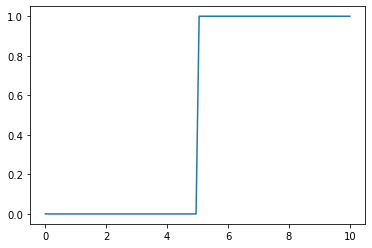

In [2]:
def gap_func(x):
    y = x.copy()
    y[y <= 5] = 0
    y[y > 5] = 1
    return y
    
x = np.linspace(0, 10, 100)
y = gap_func(x)
plt.plot(x, y)

Будем называть функцию дифференцируемой, если можно провести единственную касательную в каждой точке функции

Функция может быть дифференцируемой только если она непрерывна

Пример недифференцируемой функции $y=|x|$, такая функция не будет иметь производной в точке 0, так как мы можем провести бесконечное количество касательных в этой точке

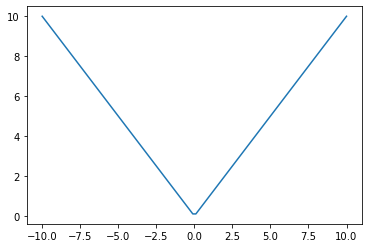

In [3]:
x = np.linspace(-10, 10, 100)
y = np.abs(x)

plt.plot(x, y)

Пример касательной

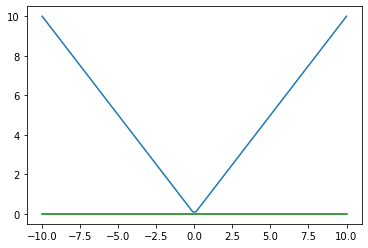

In [4]:
plt.plot(x, y)
plt.plot(x, x * 0, color='g')

Еще один пример касательной

Таких примеров можно привести очень много

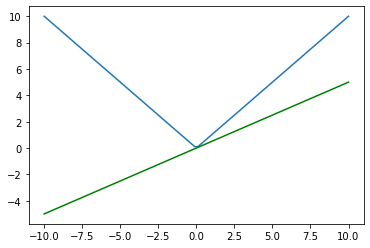

In [5]:
plt.plot(x, y)
plt.plot(x, x * 0.5, color='g')

Пример дифференцируемой функции (еще их называют гладкими функциями)

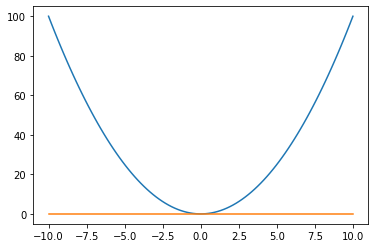

In [6]:
y = x ** 2
plt.plot(x, y)
plt.plot(x, 0 * x)

Дифференцируемые функции интересны тем, что в них легко искать максимумы и минимумы. Для этого используют понятие производной.

Касательную можно записать в виде уравнения $y = kx + b$

Значение $k$ как раз и будет значением производной функции в этой точке.

Если производная больше нуля, то функция растет

Если производная меньше нуля, то функция убывает

Если производная равна нулю, то функция либо максимальна, либо минимальная, либо имеет точку перегиба

**Теорема Ролля**

Если функция определена и дифференцируема на промежутке $[a, b]$ и $f(a) = f(b)$, то существует точка $c$, такая что $f'(c)=0$

[Доказательство](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%A0%D0%BE%D0%BB%D0%BB%D1%8F) использует некоторые другие теоремы, которые мы не рассматриваем в курсе.

Чтобы понять суть теоремы, можно еще раз обратиться к графику. Как угодно меняя функцию на этом промежутке (не меняя значения на концах), пока она будет оставаться гладкой, все равно будет образовываться хотя бы одна "ямка" или "горка"

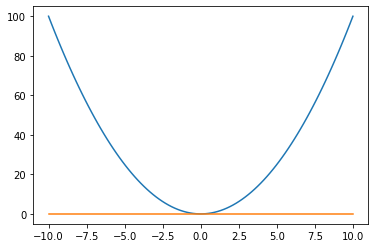

In [7]:
y = x ** 2
plt.plot(x, y)
plt.plot(x, 0 * x)

Для функция многих переменных работают все те же правила, ниже рассмотрим примеры

## Оптимизация

Для любой функции можно найти минимум, если приравнять к нулю ее производную и найти все точки, в которых она будет равна нулю

$f'(x)=0$

Каждый метод оптимизации ровно это и делает, но немного разными способами. 

### Зачем искать минимумы и максимумы функций? 

Давайте возьмем какую-нибудь модель машинного обучения $M(w, x)$, которая должна определять, изображен на картинке кот или собака. У нее есть параметр $w$ и входные данные $x$ (изображение).

Возьмем какой-то параметр $w_1$, подставим в модель и получим функцию одной переменной $M(w_1, x)=M_1(x)$

Теперь наша модель может взять какой-то пример (например, картинку $x$) и сказать что на ней изображено (кот или собака). А то, насколько качественно она будет это делать, зависит от параметра $w$.

Чтобы подобрать оптимальные параметры для какой-то обучающей выборки мы и используем методы оптимизации.

Для этого обычно вводят функцию ошибки $E(w)$, которая говорит насколько сильно наша модель ошибается на каких-то тренировочных данных для введенных параметров и чтобы подобрать оптимальные параметры мы минимизируем эту фукнцию

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import minimize

Минимизируем функцию $f(x)=x^2-3x+2$

In [9]:
def f(x):
    return x ** 2 - 3 * x + 2

Производная функции: $f'(x)=2x-3$

$f'(x)=0 $

$x_{min} = \frac{3}{2}$

Проверим численно:

In [10]:
x_start = 10
minimize(f, (x_start,))

      fun: -0.25
 hess_inv: array([[0.49999999]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([1.49999999])

Нарисуем график:

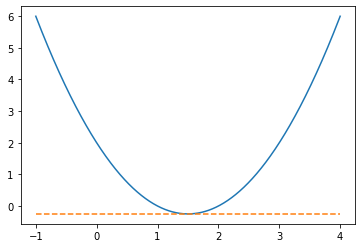

In [11]:
x = np.linspace(-1, 4, 1000)
y = f(x)
minimum = np.ones_like(x) * -0.25

plt.plot(x, y)
plt.plot(x, minimum, '--')

## Задача

Максимизировать функцию $g(x)=-x^5 - 10x^4 + 5x^3 + 10$

P.S. функции `maximize` нет в `scipy`

In [12]:
# Ваш код здесь
def fy(x):
    return (-1 * x**5 -10*x**4 +5*x**3 + 10)

def fy_inv(x):
    return -1 * fy(x)

fx_start = 10
fx_min = minimize(fy_inv, (fx_start,))
fx_min

      fun: -10.059275200004635
 hess_inv: array([[0.17768891]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 20
     njev: 21
   status: 0
  success: True
        x: array([0.35889896])

-10.059275200004635


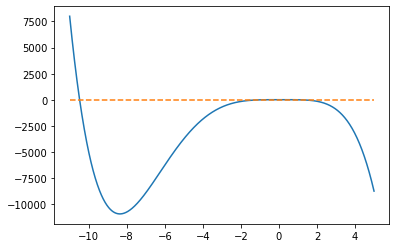

In [13]:
print(fx_min["fun"])
x = np.linspace(-11, 5, 1000)
y = fy(x)
minimum = np.ones_like(x) * -1 * fx_min["fun"]

plt.plot(x, y)
plt.plot(x, minimum, '--')

## Задача

Построить график производной функции из прошлой задачи

Производную можно вычислить аналитически и задать как функцию в python

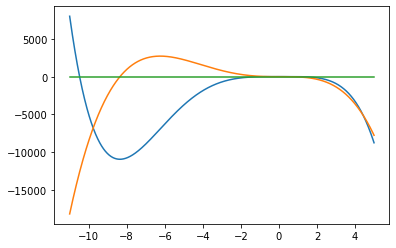

In [14]:
# Ваш код здесь
def dfx(x):
    return -5* x**4 -40 *x**3 +15*x**2

xval = np.linspace(-11,5,1000)
yval = dfx(xval)

Zero = np.ones_like(x) * 0

plt.plot(x,y)
plt.plot(xval,yval)
plt.plot(xval,Zero)


Если для функций одной переменной понятно как это работает, то для функции многих переменных используют другие, более продвинутые методы. Например, метод градиентного спуска, который мы пройдем позже, когда будем рассматривать конкретные модели машинного обучения.

[Презентация с красивыми графиками](https://iloveeconomics.ru/sites/default/files/n_d_optimization.pdf)

Оптимизируем функцию многих переменных

In [15]:
def f(x, y):
    return x ** 2 + y ** 2

In [16]:
x_start = [10, 10]
minimize(lambda x: f(x[0], x[1]), (x_start,))

      fun: 9.714371410949269e-13
 hess_inv: array([[ 0.75000002, -0.24999998],
       [-0.24999998,  0.75000002]])
      jac: array([-1.37896909e-06, -1.37896909e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([-6.96935126e-07, -6.96935126e-07])

In [17]:
def g(x):
    return f(x[0], x[1])

xx_start = [[10,10]]

minimize(g, xx_start)

      fun: 9.714371410949269e-13
 hess_inv: array([[ 0.75000002, -0.24999998],
       [-0.24999998,  0.75000002]])
      jac: array([-1.37896909e-06, -1.37896909e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([-6.96935126e-07, -6.96935126e-07])

# Теория вероятности

Подбросим монетку разное количество раз

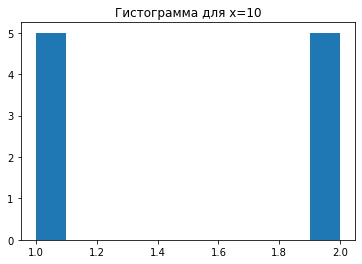

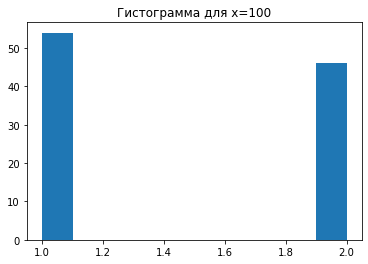

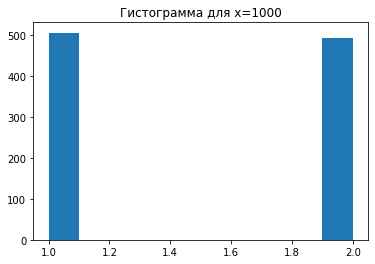

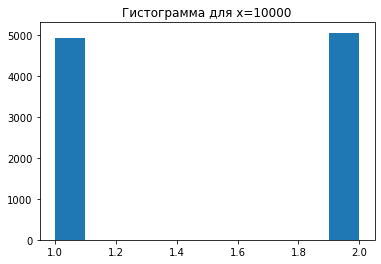

In [18]:
for x_len in [10, 100, 1000, 10000]:
    x = np.random.randint(1, 3, size=(x_len,))
    plt.figure()
    plt.title(f'Гистограмма для x={x_len}')
    plt.hist(x)

## Независимые события

Для независимых событий $A$ и $B$ с вероятностями $P(A)$ и $P(B)$ совместная вероятность (произойдут оба события) считается по формуле

$P(AB) = P(A)P(B)$

Если хотим посчитать вероятность хотя бы одного из двух

$P(A+B) = P(A) + P(B) - P(AB)$

## Дискретные и непрерывные величины

Примеры дискретных величин:

- Бросок монетки
- Бросок игрального кубика
- Вероятность брака изделия

Пример непрерывной величины:

- Значение температуры в комнате за какой-то промежуток времени
- Время, в которое приехал автобус

### Какие величины непрерывные, а какие дискретные?

- Вероятность выжить на Титанике
- Изменение цены показателя на бирже
- Пол новорожденного ребенка
- Время, в которое на футбольном матче произойдет первый гол

## Функция распределения

Это функция $F(x)$, которая характеризует вероятность того, что случайная величина примет значение, меньшее $х$

![data/discrete.png](../images/discrete.png)
![uniform](../images/uniform.png)

## Функция плотности распределения

Это функция $f(x)=F'(x)$

<img src="../images/norm_distribution.png" alt="Drawing" style="width: 600px;"/>

Вероятность того, что событие произойдет в промежутке $(a, b)$ равно интегралу функции плотности от $a$ до $b$

<AxesSubplot:ylabel='Density'>

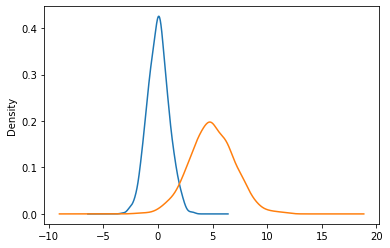

In [19]:
x = np.random.normal(loc=0, scale=1, size=(1000,))
y = np.random.normal(loc=5, scale=2, size=(1000,))
x_df = pd.DataFrame(x)
y_df = pd.DataFrame(y)
x_df[0].plot(kind='density')
y_df[0].plot(kind='density')

Смешаем распределения

<AxesSubplot:ylabel='Density'>

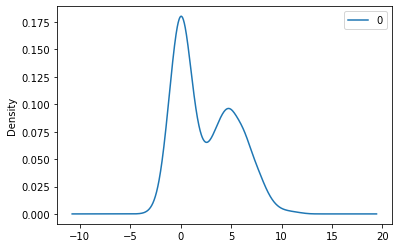

In [20]:
x_df.append(y_df).plot(kind='density')

## Нормальное распределение

Задается функцией плотности распределения

## $$f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

Среднее, мода и медиана совпадают и равны $\mu$

Среднеквадратичное отклонение равно $\sigma$

Дисперсия равна $\sigma^2$

Функция распределения называется **функцией Лапласа** (интеграл от функции выше).

Вообще, интеграл от этой функции не берется, поэтому значения функции Лапласа можно найти в специальных таблицах.

### Примеры нормального распределения

- отклонение при стрельбе
- погрешности измерений
- рост людей

### Приведение нормального распределения к стандартному

x - из нестандартного нормального распределения со средним $\mu$ и среднеквадратичным отклонением $\sigma$

z - соответствующий элемент из стандартного нормального распределения

## $z = \frac{x - \mu}{\sigma}$

## Пример

Из пункта $C$ ведётся стрельба из орудия вдоль прямой $CK$.

Предполагается, что дальность полёта распределена нормально с математическим ожиданием 1000 м и средним квадратическим отклонением 5 м.

Определить (в процентах) сколько снарядов упадёт с перелётом от 5 до 70м.

In [21]:
import scipy.stats

# Функция Лапласа для стандартного нормального распределения
def normal_integral(x):
    return scipy.stats.norm.cdf(x) - 0.5

Вероятность того, что событие $x$ произойдет в промежутке $[a, b]$ ($x$ из стандартного нормального распределения)

$P(x \in [a, b]) = \Phi(b) - \Phi(a) $

In [22]:
a = (1005 - 1000) / 5
b = (1070 - 1000) / 5
answer = normal_integral(b) - normal_integral(a)

round(answer * 100, 2)

15.87

### Правило трех сигм

При нормальном распределении с вероятностью 99% все события лежат в интервале $[\mu - 3\sigma, \mu + 3\sigma]$

![](../images/3-sigma.svg)

## Задача 

Диаметр подшипников, изготовленных на заводе, представляет собой случайную величину, распределенную нормально с математическим ожиданием 1,5 см и средним квадратическим отклонением 0,04 см.

Найти вероятность того, что размер наугад взятого подшипника колеблется от 1,4 до 1,6 см.

Оценить порядок величины можно при помощи правила трех сигм (точный ответ можно получить как в задаче выше)

In [23]:
# Ваш код здесь
a = (1.4 - 1.5) / 0.04
b = (1.6 - 1.5) / 0.04
answer = normal_integral(b) - normal_integral(a)

round(answer * 100, 2)

98.76

## Условная вероятность

$P(B|A)$ - вероятность того, что произойдет событие $B$, если произошло событие $A$

Отсюда следует формула вероятности совместного наступления событий $A$ и $B$:

$P(AB)=P(A)P(B|A)=P(B)P(B|A)$


### Формула полной вероятности

Пусть событие $A$ осуществляется лишь при совершении одного из событий $B_1, B_2, ..., B_n$, причем сумма вероятностей $B_i$ равна 1

Тогда вероятность события A будет равна

### $P(A) = P(B_1)P(A|B_1) + P(B_2)P(A|B_2) + ... + P(B_n)P(A|B_n)$

## Задача

Имеются три одинаковые урны.

В первой урне находятся 4 белых и 7 черных шаров, во второй – только белые и в третьей – только черные шары.

Наудачу выбирается одна урна и из неё наугад извлекается шар. 

Какова вероятность того, что этот шар чёрный?

In [24]:
PA = 7 / (4+7) 
PB = 0 
PC = 1
P = PA * (1/3) + 0 + PC * 1/3
print ("Вероятность = "+str(round(P, 2)))

Вероятность = 0.55


### Теорема Байеса

Допустим, мы предполагаем, что событие $A$ произойдет с вероятность $P(A)$, а $B$ с вероятностью $P(B)$ и эти события связаны. 

Если совершается событие $B$, то мы можем пересчитать вероятность события $A$

## $P(A|B) = \frac{P(B|A)  P(A)}{P(B)}$

Причем $P(B)$ обычно считаем по формуле полной вероятности

## Пример

На склад поступило 2 партии изделий: первая – 4000 штук, вторая – 6000 штук. 

Средний процент нестандартных изделий в первой партии составляет 20%, а во второй – 10%.

Наудачу взятое со склада изделие оказалось стандартным. Найти вероятность того, что оно:

а) из первой партии

б) из второй партии.

### Решение

Всего на складе 10000 изделий.

Тогда 

$P(B_1)=0.4$

$P(B_2)=0.6$

Пусть, $A$ - наудачу взятое изделие оказалось стандартным

$P(A|B_1) = 1 - 0.2 = 0.8$

$P(A|B_2) = 1 - 0.1 = 0.9$

$P(A) = P(B_1)P(A|B_1) + P(B_2)P(A|B_2) = 0.86$

Остается применить формулу Байеса:

$P(B_1|A) - ?$

$P(B_2|A) - ?$

## Задача

По данным о погоде определить:

- вероятность того, что температура будет в промежутке от 10 до 20 градусов
- вероятность того, что температура изменится больше, чем на 5 градусов на следующий день
- вероятность получить отрицательную температуру зимой

In [27]:
# Ваш код здесь
df = pd.read_csv('../data/weather.csv', parse_dates=True)

P10_20 = df[(df["t"]>10)&(df["t"]<20)]["t"].count() / df["t"].count()
print ("10-20: "+str(round(P10_20*100, 2))+ "%")

df["diff"] = abs(df["t"].diff())
Pd_5 = df[df["diff"]>5]["diff"].count() / df["diff"].count()
print ("diff 5: "+str(round(Pd_5*100, 2))+ "%")

10-20: 28.01%
diff 5: 8.25%


In [28]:
df["Day"] = pd.to_datetime(df["Day"],format="%Y-%m-%d")
df["month"] = df.Day.dt.month

In [32]:
winter_df = df[df["month"].isin([12,1,2])]
PW0 = winter_df[winter_df["t"]<0]["t"].count() / winter_df["t"].count()
print ("Winter <0 : "+str(round(PW0*100, 2))+ "%")

Winter <0 : 61.08%


## Задача

По тем же данным посчитать:

- вероятность получить отрицательную температуру, используя формулу полной вероятности (гипотезы - времена года).
- вероятность, что сейчас зима, если известно, что температура отрицательна.

## Разница между байесовской вероятностью и классической

<img src="../images/bayesianjpg.jpg" alt="Drawing" style="width: 600px;"/>

## Теорема Байеса и тест на ВИЧ

https://www.facebook.com/mifnauka/posts/1819406961640274/

# Домашнее задание

Для выполнения задач Easy и Normal опять используем данные Титаника

## Easy

Вычислить вероятность выживания, если пассажиру:

- от 0 до 25 лет
- от 25 до 50 лет
- от 50 лет и старше

## Normal

Вычислить с какой вероятностью пассажир женского пола, если известно, что он выжил (использовать теорему Байеса)

## Hard

Закон распределения задается функцией плотности 

$ f(x) = \lambda e^{-\lambda x}, x > 0 $

$ f(x) = 0, x <= 0 $

Найти вероятность того, что событие произойдет при $x \in [1, 2]$

P.S. в scipy есть функция для интегрирования функции